In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

In [ ]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
STATES

16

In [ ]:
ACTIONS

4

In [ ]:
# hyperparameter 
EPISODES = 3000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96 # gamma or γ is a discount factor
RENDER = False # if you want to see training set to true
epsilon = 0.9

#Learning Rate: lr or learning rate, often referred to as alpha or α, can simply be defined as how much you accept the new value vs the old value. Above we are taking the difference between new and old and then multiplying that value by the learning rate. This value then gets added to our previous q-value which essentially moves it in the direction of our latest update.
#Gamma: gamma or γ is a discount factor. It’s used to balance immediate and future reward. From our update rule above you can see that we apply the discount to the future reward. Typically this value can range anywhere from 0.8 to 0.99.
#Reward: reward is the value received after completing a certain action at a given state. A reward can happen at any given time step or only at the terminal time step.
#Max: np.max() uses the numpy library and is taking the maximum of the future reward and applying it to the reward for the current state. What this does is impact the current action by the possible future reward. This is the beauty of q-learning. We’re allocating future reward to current actions to help the agent select the highest return action at any given state.

In [ ]:
rewards = []
for episode in range(EPISODES):

   #get the starting state in Evr. after reset
  state = env.reset() # staring from frist
  for _ in range(MAX_STEPS):  #Explore the env. till the max step;
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      #Random action in Envr.
      action = env.action_space.sample()    # rendom action 
    else:
      #next state of agent
      action = np.argmax(Q[state, :])

    #we dont' care about the info values _, that's why we ignore it ...
    next_state, reward, done, _ = env.step(action)
   
    # Q-learing formula  
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.14120834e-02 2.32679791e-01 6.41320777e-03 1.07479507e-02]
 [4.56005459e-03 1.02858741e-03 4.81390351e-03 7.70540122e-02]
 [3.12405635e-03 3.41606775e-03 3.64059782e-03 5.83461005e-02]
 [2.57978057e-03 2.36990788e-03 1.40891444e-03 7.08022898e-03]
 [3.27148028e-01 2.71277288e-03 3.06842882e-03 4.08054567e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.54286871e-02 7.89037730e-06 7.15124127e-06 1.51969297e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.80371176e-03 2.77749027e-03 3.93515182e-03 5.82562292e-01]
 [6.31967040e-03 3.82424468e-01 5.84654946e-03 2.96578869e-03]
 [1.64911368e-01 1.97328858e-04 2.56477072e-04 2.19665770e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.57276838e-02 1.80892911e-02 5.76275793e-01 1.75423673e-02]
 [3.76497405e-02 9.28089857e-01 6.77279741e-02 5.43050937e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [ ]:
env.render()
#SFFF       (S: starting point, safe)
#FHFH       (F: frozen surface, safe)
#FFFH       (H: hole, fall to your doom)
#HFFG       (G: goal, where the frisbee is located)

  (Down)
SFFF
FHFH
FFFH
HFFG


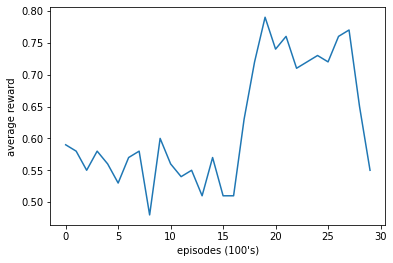

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [ ]:
#---Sarsa Algorithm----

In [ ]:
import numpy as np 
import gym 


In [ ]:
env = gym.make('FrozenLake-v0') 

In [ ]:

#Defining the different parameters 
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
  
#Initializing the Q-matrix 
Q = np.zeros((env.observation_space.n, env.action_space.n)) 

In [ ]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:

#Function to choose the next action 
def choose_action(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(Q[state, :]) 
    return action 
  
  
#Function to learn the Q-value 
def update(state, state2, reward, action, action2): 
    predict = Q[state, action] 
    target = reward + gamma * Q[state2, action2] 
    Q[state, action] = Q[state, action] + alpha * (target - predict) 

In [ ]:
#Initializing the reward 
reward=0
  
# Starting the SARSA learning 
for episode in range(total_episodes): 
    t = 0
    state1 = env.reset() 
    action1 = choose_action(state1) 
  
    while t < max_steps: 
        #Visualizing the training 
        env.render() 
          
        #Getting the next state 
        state2, reward, done, info = env.step(action1) 
  
        #Choosing the next action 
        action2 = choose_action(state2) 
          
        #Learning the Q-value 
        update(state1, state2, reward, action1, action2) 
  
        state1 = state2 
        action1 = action2 
          
        #Updating the respective vaLues 
        t += 1
        reward += 1
          
        #If at the end of learning process 
        if done: 
            break

Streaming output truncated to the last 5000 lines.
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)


In [ ]:

#Evaluating the performance 
print ("Performace : ", reward/total_episodes) 
  
#Visualizing the Q-matrix 
print(Q) 

Performace :  0.0001
[[3.11316533e-03 2.10135196e-03 1.04033615e-03 2.87091599e-03]
 [8.76500842e-04 2.43996653e-05 5.49325817e-05 1.07720975e-02]
 [1.60119929e-02 1.29686392e-02 5.34018593e-03 6.74900155e-03]
 [4.63317704e-04 9.54697301e-03 8.54396778e-04 2.00398078e-03]
 [6.38467910e-03 1.06027122e-03 8.89405998e-04 4.04543936e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.58867393e-02 2.55331617e-03 1.21078241e-01 2.04409047e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.54901354e-04 1.74668915e-02 1.73032061e-03 4.39720960e-04]
 [4.27077201e-05 5.34700539e-01 2.96387595e-04 3.94385149e-03]
 [4.23764568e-02 1.46046489e-02 1.40261886e-02 6.00165097e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.67488638e-02 1.92916471e-02 1.14487686e-01 9.80968069e-02]
 [5.12272730e-02 9.89301930e-01 7.25565968e-02 3.14757343e-01]
 [0.00000000e+00 0.00000000e+00 0.